In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#read dataset
df = pd.read_csv('Invoices_Train.csv')

# Convert Invoice_Date to datetime format
df["Invoice_Date"] = pd.to_datetime(df["Invoice_Date"])


In [5]:
# Check the first few rows
print(df.head())

  Invoice_ID Vendor_ID Invoice_Date  Total_Amount Currency   Status  \
0  INV-00001  VEND-019   2023-01-01        929.46      USD     Paid   
1  INV-00002  VEND-008   2023-01-02        621.19      USD     Paid   
2  INV-00003  VEND-016   2023-01-03       3375.33      USD     Paid   
3  INV-00004  VEND-002   2023-01-04       4188.03      GBP     Paid   
4  INV-00005  VEND-004   2023-01-05       3504.20      GBP  Pending   

   Exchange_Rate  Total_Amount_INR  
0           82.5         76680.450  
1           82.5         51248.175  
2           82.5        278464.725  
3          102.0        427179.060  
4          102.0        357428.400  


In [7]:
# Summary statistics
print(df.describe())

              Invoice_Date  Total_Amount  Exchange_Rate  Total_Amount_INR
count                 5000   5000.000000    5000.000000       5000.000000
mean   2029-11-04 12:00:00   2767.295120      85.761700     237350.840717
min    2023-01-01 00:00:00    500.380000      82.500000      41466.975000
25%    2026-06-03 18:00:00   1636.087500      82.500000     139116.881250
50%    2029-11-04 12:00:00   2745.420000      82.500000     233848.160000
75%    2033-04-07 06:00:00   3943.752500      89.000000     336277.972500
max    2036-09-08 00:00:00   4999.580000     102.000000     509342.100000
std                    NaN   1313.244573       5.886577     114035.549996


In [9]:
# Check for missing values
print(df.isnull().sum())

Invoice_ID          0
Vendor_ID           0
Invoice_Date        0
Total_Amount        0
Currency            0
Status              0
Exchange_Rate       0
Total_Amount_INR    0
dtype: int64


In [11]:
# Extract year-month for grouping
df["YearMonth"] = df["Invoice_Date"].dt.to_period("M")

# Aggregate total spending per month
monthly_spending = df.groupby("YearMonth")["Total_Amount_INR"].sum().reset_index()

# Convert YearMonth to string for better visualization
monthly_spending["YearMonth"] = monthly_spending["YearMonth"].astype(str)

# Display aggregated data
print(monthly_spending)

    YearMonth  Total_Amount_INR
0     2023-01       7171953.455
1     2023-02       6154808.585
2     2023-03       7216637.530
3     2023-04       8708109.690
4     2023-05       8391315.180
..        ...               ...
160   2036-05       7729360.020
161   2036-06       6762972.905
162   2036-07       7094888.380
163   2036-08       7911880.395
164   2036-09       2188388.945

[165 rows x 2 columns]


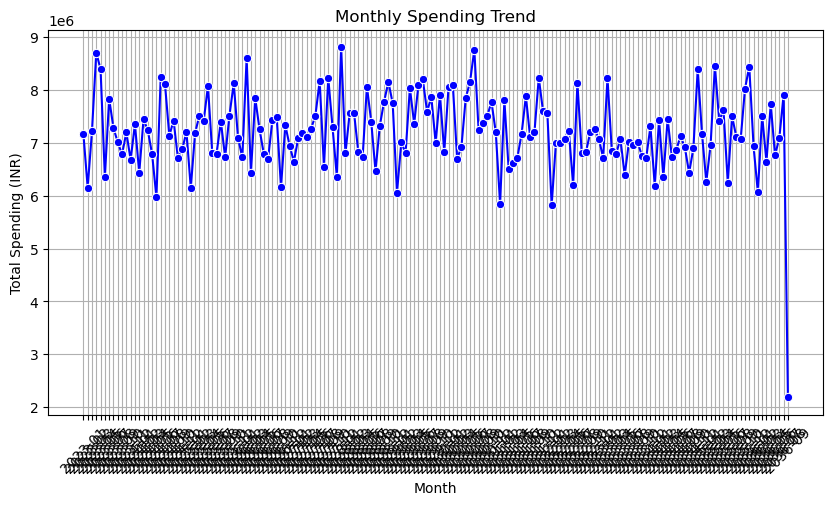

In [13]:
plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_spending, x="YearMonth", y="Total_Amount_INR", marker="o", color="b")
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Total Spending (INR)")
plt.title("Monthly Spending Trend")
plt.grid(True)
plt.show()

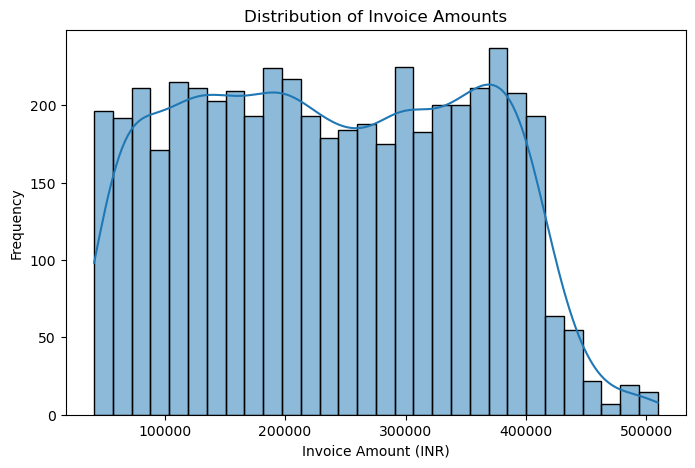

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(df["Total_Amount_INR"], bins=30, kde=True)
plt.xlabel("Invoice Amount (INR)")
plt.ylabel("Frequency")
plt.title("Distribution of Invoice Amounts")
plt.show()

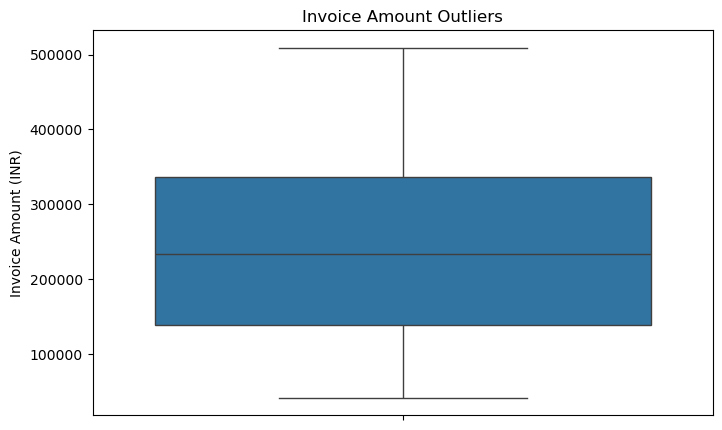

In [19]:
plt.figure(figsize=(8,5))
sns.boxplot(y=df["Total_Amount_INR"])
plt.ylabel("Invoice Amount (INR)")
plt.title("Invoice Amount Outliers")
plt.show()

/var/folders/b5/7xxf201d4dlgs0txsxw00m8w0000gn/T/ipykernel_13318/3319512653.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vendor_spending.head(5), x="Vendor_Name", y="Total_Amount_INR", palette="Blues_r")


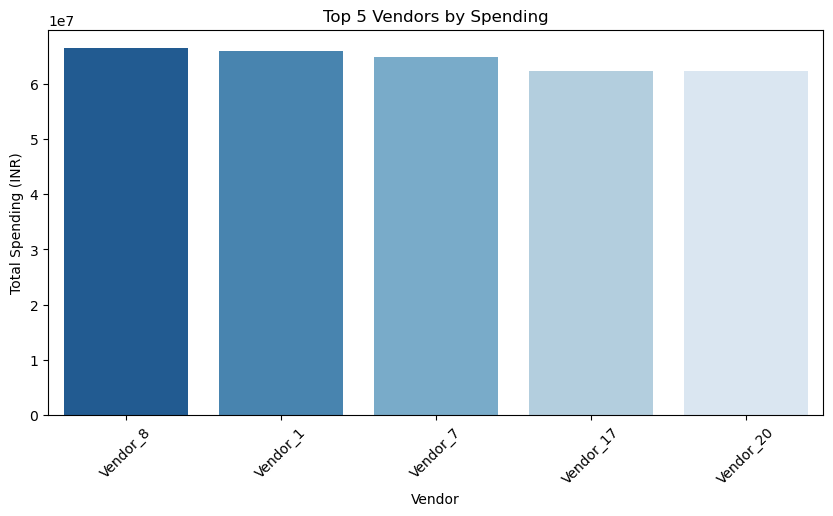

In [23]:
# Load vendor details
vendors_df = pd.read_csv("Vendors.csv")

# Merge invoice data with vendor names
df_merged = df.merge(vendors_df, on="Vendor_ID", how="left")

# Group by vendor and sum total spending
vendor_spending = df_merged.groupby("Vendor_Name")["Total_Amount_INR"].sum().reset_index()

# Sort vendors by spending
vendor_spending = vendor_spending.sort_values(by="Total_Amount_INR", ascending=False)

# Bar chart of top 5 vendors
plt.figure(figsize=(10,5))
sns.barplot(data=vendor_spending.head(5), x="Vendor_Name", y="Total_Amount_INR", palette="Blues_r")
plt.xticks(rotation=45)
plt.xlabel("Vendor")
plt.ylabel("Total Spending (INR)")
plt.title("Top 5 Vendors by Spending")
plt.show()

In [25]:
# Identify the top 5 highest invoices
high_invoices = df.nlargest(5, "Total_Amount")
print(high_invoices)

     Invoice_ID Vendor_ID Invoice_Date  Total_Amount Currency   Status  \
2717  INV-02718  VEND-001   2030-06-10       4999.58      USD     Paid   
2333  INV-02334  VEND-006   2029-05-22       4999.47      USD  Pending   
3913  INV-03914  VEND-010   2033-09-18       4997.82      EUR     Paid   
2986  INV-02987  VEND-017   2031-03-06       4997.77      USD  Pending   
1062  INV-01063  VEND-015   2025-11-28       4995.40      USD  Pending   

      Exchange_Rate  Total_Amount_INR YearMonth  
2717           82.5        412465.350   2030-06  
2333           82.5        412456.275   2029-05  
3913           89.0        444805.980   2033-09  
2986           82.5        412316.025   2031-03  
1062           82.5        412120.500   2025-11  


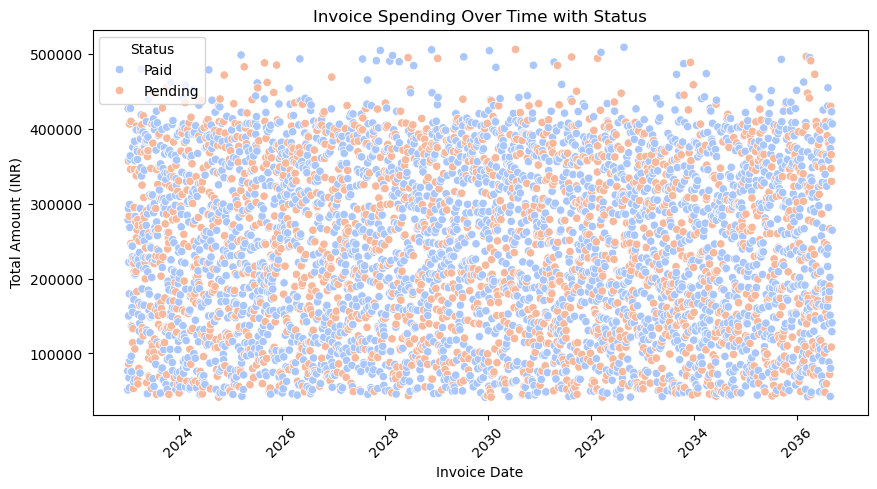

In [27]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x=df["Invoice_Date"], y=df["Total_Amount_INR"], hue=df["Status"], palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Invoice Date")
plt.ylabel("Total Amount (INR)")
plt.title("Invoice Spending Over Time with Status")
plt.legend(title="Status")
plt.show()

Feature Engineering:

step 1:1️⃣ Moving Averages
Moving averages smooth out fluctuations in spending, helping identify trends.

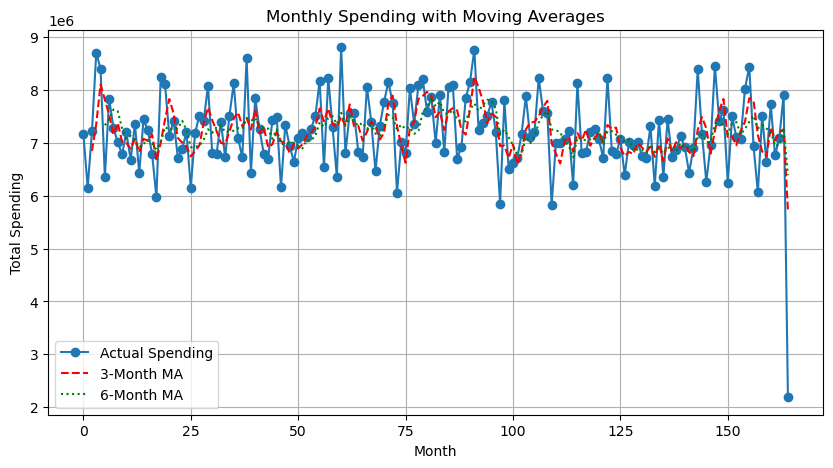

In [37]:
# Calculate 3-month and 6-month moving averages
monthly_spending["MA_3"] = monthly_spending["Total_Amount_INR"].rolling(window=3).mean()
monthly_spending["MA_6"] = monthly_spending["Total_Amount_INR"].rolling(window=6).mean()

# Plot the moving averages
plt.figure(figsize=(10,5))
plt.plot(monthly_spending["Total_Amount_INR"], label="Actual Spending", marker="o")
plt.plot(monthly_spending["MA_3"], label="3-Month MA", linestyle="dashed", color="red")
plt.plot(monthly_spending["MA_6"], label="6-Month MA", linestyle="dotted", color="green")
plt.xlabel("Month")
plt.ylabel("Total Spending")
plt.title("Monthly Spending with Moving Averages")
plt.legend()
plt.grid()
plt.show()

above graph shows probabily it can be a white noise data.

let's check it statasticlly.

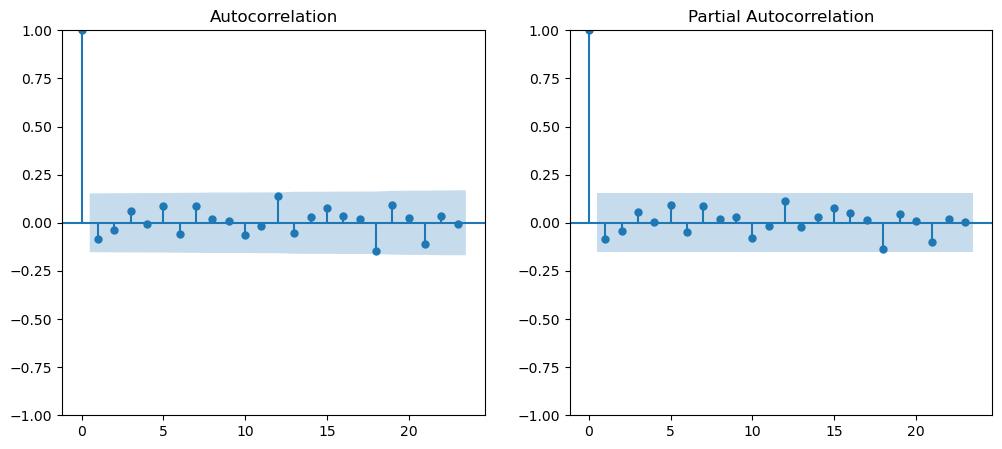

In [49]:
# Check Autocorrelation (ACF & PACF)
# White noise has no significant autocorrelation.
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Aggregate monthly spending
monthly_spending = df.groupby("YearMonth")["Total_Amount_INR"].sum().reset_index()
monthly_spending["YearMonth"] = monthly_spending["YearMonth"].astype(str)
monthly_spending["YearMonth"] = pd.to_datetime(monthly_spending["YearMonth"])
monthly_spending.set_index("YearMonth", inplace=True)

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plot_acf(monthly_spending["Total_Amount_INR"], ax=axes[0])
plot_pacf(monthly_spending["Total_Amount_INR"], ax=axes[1])
plt.show()

Perform the Ljung-Box Test
This test checks if the time series is random (white noise).

In [54]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Ljung-Box Test for randomness
ljung_test = acorr_ljungbox(monthly_spending["Total_Amount_INR"], lags=[10])
print(ljung_test)

     lb_stat  lb_pvalue
10  6.185161   0.799474


If p-value > 0.05, the data is likely white noise (random).
If p-value < 0.05, the data is predictable.

Understanding White Noise in Time Series Data
If your monthly spending data is white noise, it means the data has no discernible pattern, trend, or seasonality. White noise is random and unpredictable, making forecasting models like ARIMA, Prophet, or LSTMs ineffective.